---
# Імпорт модулів
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

---
# Матриці
---



Якщо у вас є набір даних з $m$ вибірок, кожна з яких називається $x^{(i)}$ ($n$-вимірний вектор), і вектор результатів $ Y $ ($m$-вимірний вектор), можна побудувати наступні матриці:

1. Матриця ознак

$$ \mathbf{X} = 
\begin{pmatrix}
\vec{x}^{(1)} \\
\vec{x}^{(2)} \\
\vdots\\
\vec{x}^{(m)} \\
\end{pmatrix} =

\begin{pmatrix}
1 & x_1^{(1)} & x_2^{(1)} & \ldots & x_n^{(1)}\\
1 & x_1^{(2)} & x_2^{(2)} & \ldots & x_n^{(2)}\\
\vdots & \vdots    & \vdots    &  \ddots & \vdots \\
1 & x_1^{(m)} & x_2^{(m)} & \ldots & x_n^{(m)}\\
\end{pmatrix}
$$

2. Вектор результатів

$$
\vec{Y} = 
\begin{pmatrix}
\vec{y}_1 \\
\vec{y}_2 \\
\vdots\\
\vec{y}_m \\
\end{pmatrix}
$$

3. Вектор вагових коефіцієнтів

$$
\vec{w} = 
\begin{pmatrix}
\vec{w}_0 \\
\vec{w}_1 \\
\vdots\\
\vec{w}_n \\
\end{pmatrix}
$$

---
# Задача
---

Наша задача --- проаналізувати, як залежить ціна на будинок $h$ залежно від площі $x_1$, кількості ванних кімнат $x_2$ та кількості спалень $x_2$.

---
# "Self-made" реалізація алгоритму градієнтного спуску
---

## Функція гіпотези лінійної регресії

Функція має вигляд:
$$ \vec{h}(\vec{w}, X) = X \vec{w}, $$
де  $ \vec{w} $ --- вектор вагових коефіцієнтів, $ X $ --- вектор-стовпець векторів ознак (матриця ознак).

In [2]:
def h(W, X):
    """
    Calculate the hypothesis for linear regression.

    Parameters:
    W (numpy.ndarray): Weight vector (dimension: (n+1,)).
    X (numpy.ndarray): Feature matrix (dimension: (m, n+1)).

    Returns:
    hypothesis (numpy.ndarray): Hypothesis values (dimension: (m,)).
    """
    return X @ W

## Функція втрат лінійної регресії

Функція має вигляд:

$$ J(\vec{w}) = \frac1{2m} \left( \vec{h}(\vec{w}, \mathbf{X}) - \vec{Y} \right)^2 $$

In [3]:
def J(W, X, Y):
    """
    Calculate the mean squared error (MSE) for linear regression.

    Parameters:
    W (numpy.ndarray): Weight vector (dimension: (n+1,)).
    X (numpy.ndarray): Feature matrix (dimension: (m, n+1)).
    Y (numpy.ndarray): Target vector (dimension: (m,)).

    Returns:
    mse (float): Mean squared error.
    """
    m = len(Y)  # Кількість навчальних прикладів
    error = h(W, X) - Y
    return 1 / ( 2 * m ) * error @ error

## Градієнт функції втрат 

Вектор-градієнт функції втрат  має вигляд:

$$ \vec{\nabla} J = \frac1{m} \mathbf{X}^{\mathrm{T}} \cdot (\mathrm{X}\vec{w} - \vec{Y} )  = \frac1{m} \mathbf{X}^{\mathrm{T}} \cdot (\vec{h} - \vec{Y} ) $$

In [4]:
def nabla_J(W, X, Y):
    """
    Computes the gradient of the loss function for linear regression.

    Parameters:
    W (numpy.ndarray): Vector of weights (dimensionality (n+1,)).
    X (numpy.ndarray): Feature matrix (dimensionality (m, n+1)).
    Y (numpy.ndarray): Target value vector (dimensionality (m,)).

    Returns:
    Gradient (numpy.ndarray): The gradient of the loss function (dimension (n+1,)).
    """
    
    m = len(Y)  # Кількість навчальних прикладів
    error  = X.T @ (h(W, X) - Y)
    gradient = (1 / m) * error
    return gradient

## Функція градієнтного спуску

Формула для обчислення вагових коефіцієнтів в результаті одного кроку градієнтного спуску (одна ітерація) має вигляд:

$$ \vec{w} = \vec{w}_{\text{prev}} - \alpha \vec{\nabla} J $$

In [5]:
def gradient_descent(X, Y, 
                     alpha=0.001, 
                     num_iterations=1_000, 
                     epsilon=1e-7):
    """
    Perform gradient descent optimization for linear regression.

    Parameters:
    X (numpy.ndarray): Feature matrix (dimension: (m, n+1)).
    Y (numpy.ndarray): Target vector (dimension: (m,)).
    alpha (float, optional): Learning rate. Defaults to 0.001.
    num_iterations (int, optional): Number of iterations. Defaults to 1000.
    epsilon (float, optional): Convergence threshold. Defaults to 1e-7.

    Returns:
    W (numpy.ndarray): Optimized weight vector (dimension: (n+1,)).
    history_J (list): List of loss values during optimization.
    """
    
    n = X.shape[1]  # Кількість ознак (у цьому випадку 3: area, bedrooms, bathrooms)
    
    # Ініціалізуємо вагові коефіцієнти випадковими значеннями
    W = np.random.randn(n)
    
    J_0 = J(W, X, Y)
    
    history_J = [J_0]
    
    for _ in range(num_iterations):       
        # Оновлюємо коефіцієнти
        W -= alpha * nabla_J(W, X, Y)
        
        J_current = J(W, X, Y)
        
        history_J.append(J_current)
        
        if np.abs(J_current - J_0) < epsilon:
            break
        
        J_0 = J_current
        
        
    return W, history_J

---
# Завантаження даних
---

In [6]:
df = pd.read_csv('Housing.csv')
X = df[['area', 'bedrooms', 'bathrooms']].to_numpy()
Y = df.price.to_numpy()

## Нормалізація даних

Щоб наша модель швидше навчалась, необхідно виконати нормалізацію даних, оскільки $x_1 = \text{area}$ сильно відрізняється за порядком від $x_2 = \text{bedrooms}$ та $x_3 = \text{bathrooms}$.

Нормалізацію виконаємо за формулою:

$$ \mathrm{X}^{\text{norm}} = \frac{\mathrm{X} - \overline{\mathrm{X}}}{\sigma}, $$

де $\overline{\mathrm{X}}$ - середнє (за стовбчиком), $\sigma$ - дисперсія (стандртне відхилення).


In [7]:
def normalize_features(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    
    # Перевіряємо, що стандартне відхилення не дорівнює нулю
    std[std == 0] = 1
    
    normalized_X = (X - mean) / std
    return normalized_X, mean, std

In [8]:
# Нормалізуємо ознаки
X_n, mean, std = normalize_features(X)

# Додаємо стовпець з одиницями для вільного члена (bias)
X_n = np.column_stack([np.ones(len(X)), X_n])

---
# Перевірка "Self-made" алгоритмів
---

In [9]:
# Викликаємо функцію градієнтного спуску
learned_weights, history_J = gradient_descent(X_n, Y, num_iterations=100_000)

# Відновлюємо ненормалізовані ваги
intercept = learned_weights[0]
coefficients = learned_weights[1:] / std

### Вагові коефіцієнти після градієнтного спуску

In [10]:
print(f"Вільний член (intercept): {intercept}")
print(f"Коефіцієнти ознак (area, bedrooms, bathrooms): {coefficients}")

Вільний член (intercept): 4766729.2343355445
Коефіцієнти ознак (area, bedrooms, bathrooms): [3.78762796e+02 4.06820993e+05 1.38604801e+06]


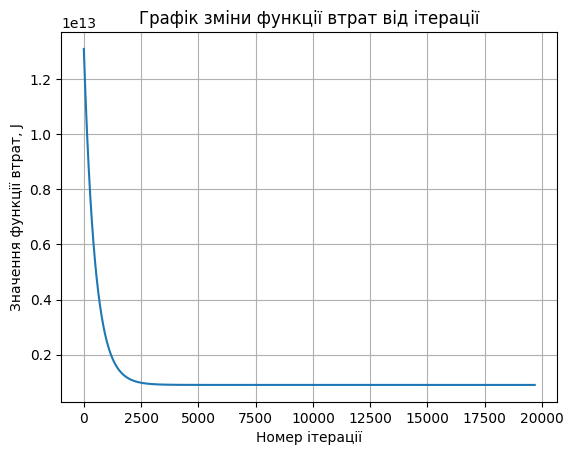

In [11]:
plt.plot(history_J)
plt.xlabel('Номер ітерації')
plt.ylabel('Значення функції втрат, J')
plt.title('Графік зміни функції втрат від ітерації')
plt.grid(True)

plt.show()

---
# Аналітичне значення для вектора $\vec{w}$
---

Аналітичний вираз для вектора вагових коефіцієнтів:

$$ \vec{w}^* = \left(\mathbf{X}^{\mathrm{T}} \mathbf{X}\right)^{-1}\mathbf{X}^{\mathrm{T}} \vec{y}. $$

In [12]:
analitical_W = np.linalg.pinv(X.T @ X) @ X.T @ Y
analitical_W

array([3.72448352e+02, 3.68974672e+05, 1.37031315e+06])

# Алгоритми бібліотеки `sklearn.linear_model`

Алгоритми реалізують метод найменших квадратів (МНК)

In [13]:
regressor = LinearRegression().fit(X, Y)
h_sk = regressor.predict(X)

## Візуалізація за `sklearn.linear_model`

Цікаво побачити результати лінійної регресії.

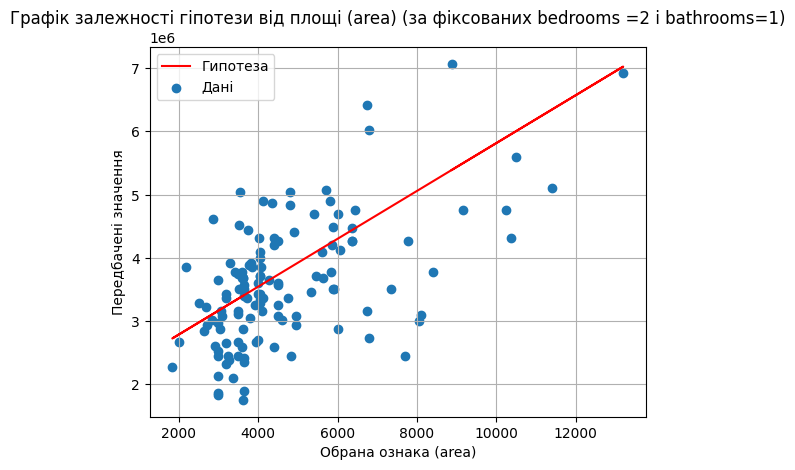

In [14]:
# Створимо маску для фільтрації даних з урахуванням фіксованих значень
f_1, f_2 = 2, 1

mask = (X[:, 1] == f_1) & (X[:, 2] == f_2)

# Обираємо відповідні значення для фіксованих ознак і передбачені значення
selected_feature = X[mask][:, 0]
h_sk_selected = h_sk[mask]
Y_selected = Y[mask]

# Гграфік залежності гіпотези від обраної ознаки за фіксованих значень інших ознак
plt.plot(selected_feature, h_sk_selected, label="Гипотеза", color='red')
plt.scatter(selected_feature, Y_selected, label="Дані")
plt.xlabel("Обрана ознака (area)")
plt.ylabel("Передбачені значення")
plt.title(f"Графік залежності гіпотези від площі (area) (за фіксованих bedrooms ={f_1} і bathrooms={f_2})")
plt.legend()
plt.grid(True)
plt.show()

---
# Результати та висновки
---

## Результати

1. За "self-made" алгоритмом градієнтного спуску

In [15]:
print(f"Коефіцієнти ознак (area, bedrooms, bathrooms): {coefficients}")

Коефіцієнти ознак (area, bedrooms, bathrooms): [3.78762796e+02 4.06820993e+05 1.38604801e+06]


2. За аналітичним розрахунком

In [16]:
print(f"Коефіцієнти ознак (area, bedrooms, bathrooms): {analitical_W}")


Коефіцієнти ознак (area, bedrooms, bathrooms): [3.72448352e+02 3.68974672e+05 1.37031315e+06]


3. За МНК із бібліотеки `scisklearn.linear_model`

In [17]:
print(f"Коефіцієнти ознак (area, bedrooms, bathrooms): {regressor.coef_}")

Коефіцієнти ознак (area, bedrooms, bathrooms): [3.78762754e+02 4.06820034e+05 1.38604950e+06]


## Вартість квартири

Розглянемо конкретний випадок. Зробимо передбачення ціни на квартиру яка має характеристики $x_1 = 7420$, $x_2 = 3$, $x_3 = 1$.

In [18]:
my_X = np.array([[7420, 3, 1]])

1. Наша функція гіпотези

In [19]:
print(f"Ціна за квартиру {h(coefficients, my_X)[0]:.0f}")

Ціна за квартиру 5416931


2. Функція  бібліотеки `scisklearn.linear_model`

In [20]:
print(f"Ціна за квартиру {regressor.predict(my_X)[0]:.0f}")

Ціна за квартиру 5243758


## Висновки
Відмінності в значеннях коефіцієнтів між методами (градієнтним спуском, аналітичним методом і МНК) може бути зумовлена відмінностями в підходах і параметрах кожного методу. 

У цьому контексті:

1. Градієнтний спуск - ітеративний метод, який залежить від початкової ініціалізації та параметрів навчання, таких як швидкість навчання. Результати можуть варіюватися залежно від цих факторів.

2. Аналітичний метод - знаходить точне аналітичне рішення і не залежить від параметрів навчання. Він може надати точні значення коефіцієнтів.

3. Метод найменших квадратів (МНК) - також знаходить точне рішення і не вимагає налаштування параметрів навчання.

Відмінності у вагових коефіцієнтах можуть бути спричинені як відмінностями в методах оптимізації, так і в особливостях даних, таких як наявність викидів, шумів або кореляцій між ознаками. Однак важливо зазначити, що за правильного налаштування й обробки даних відмінності в коефіцієнтах між цими методами мають бути незначними, і всі три методи мають давати схожі результати в контексті лінійної регресії.